In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [2]:
print("Available datasets:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Available datasets:
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [3]:
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')

# Data understanding:
Questions that one might ask based on this dataset:

# Data preprocessing:

In [4]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Data cleaning:

#### Dealing with impossible and missing values: 

Because the dataset is clean and complete (no missing values, no impossible values, no bad formatting), no further preprocessing of data is neccessary in this regards.

In [5]:
print("MISSING VALUES FOR EACH VARIABLE:\n",df.isnull().sum(), "\n")
print("SHAPE OF THE DATASET:", df.shape)

MISSING VALUES FOR EACH VARIABLE:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64 

SHAPE OF THE DATASET: (253680, 22)


#### Checking outliers:
Extreme values of the variables must be evaluated to determine if they should be considered as outliers.

##### NUMERICAL FEATURES:
Out of the 22 columns of the dataset, only *BMI, MentHlth, PhysHlth, Age* and *Income* are numerical features. In other words, they consist of actual numerical values.

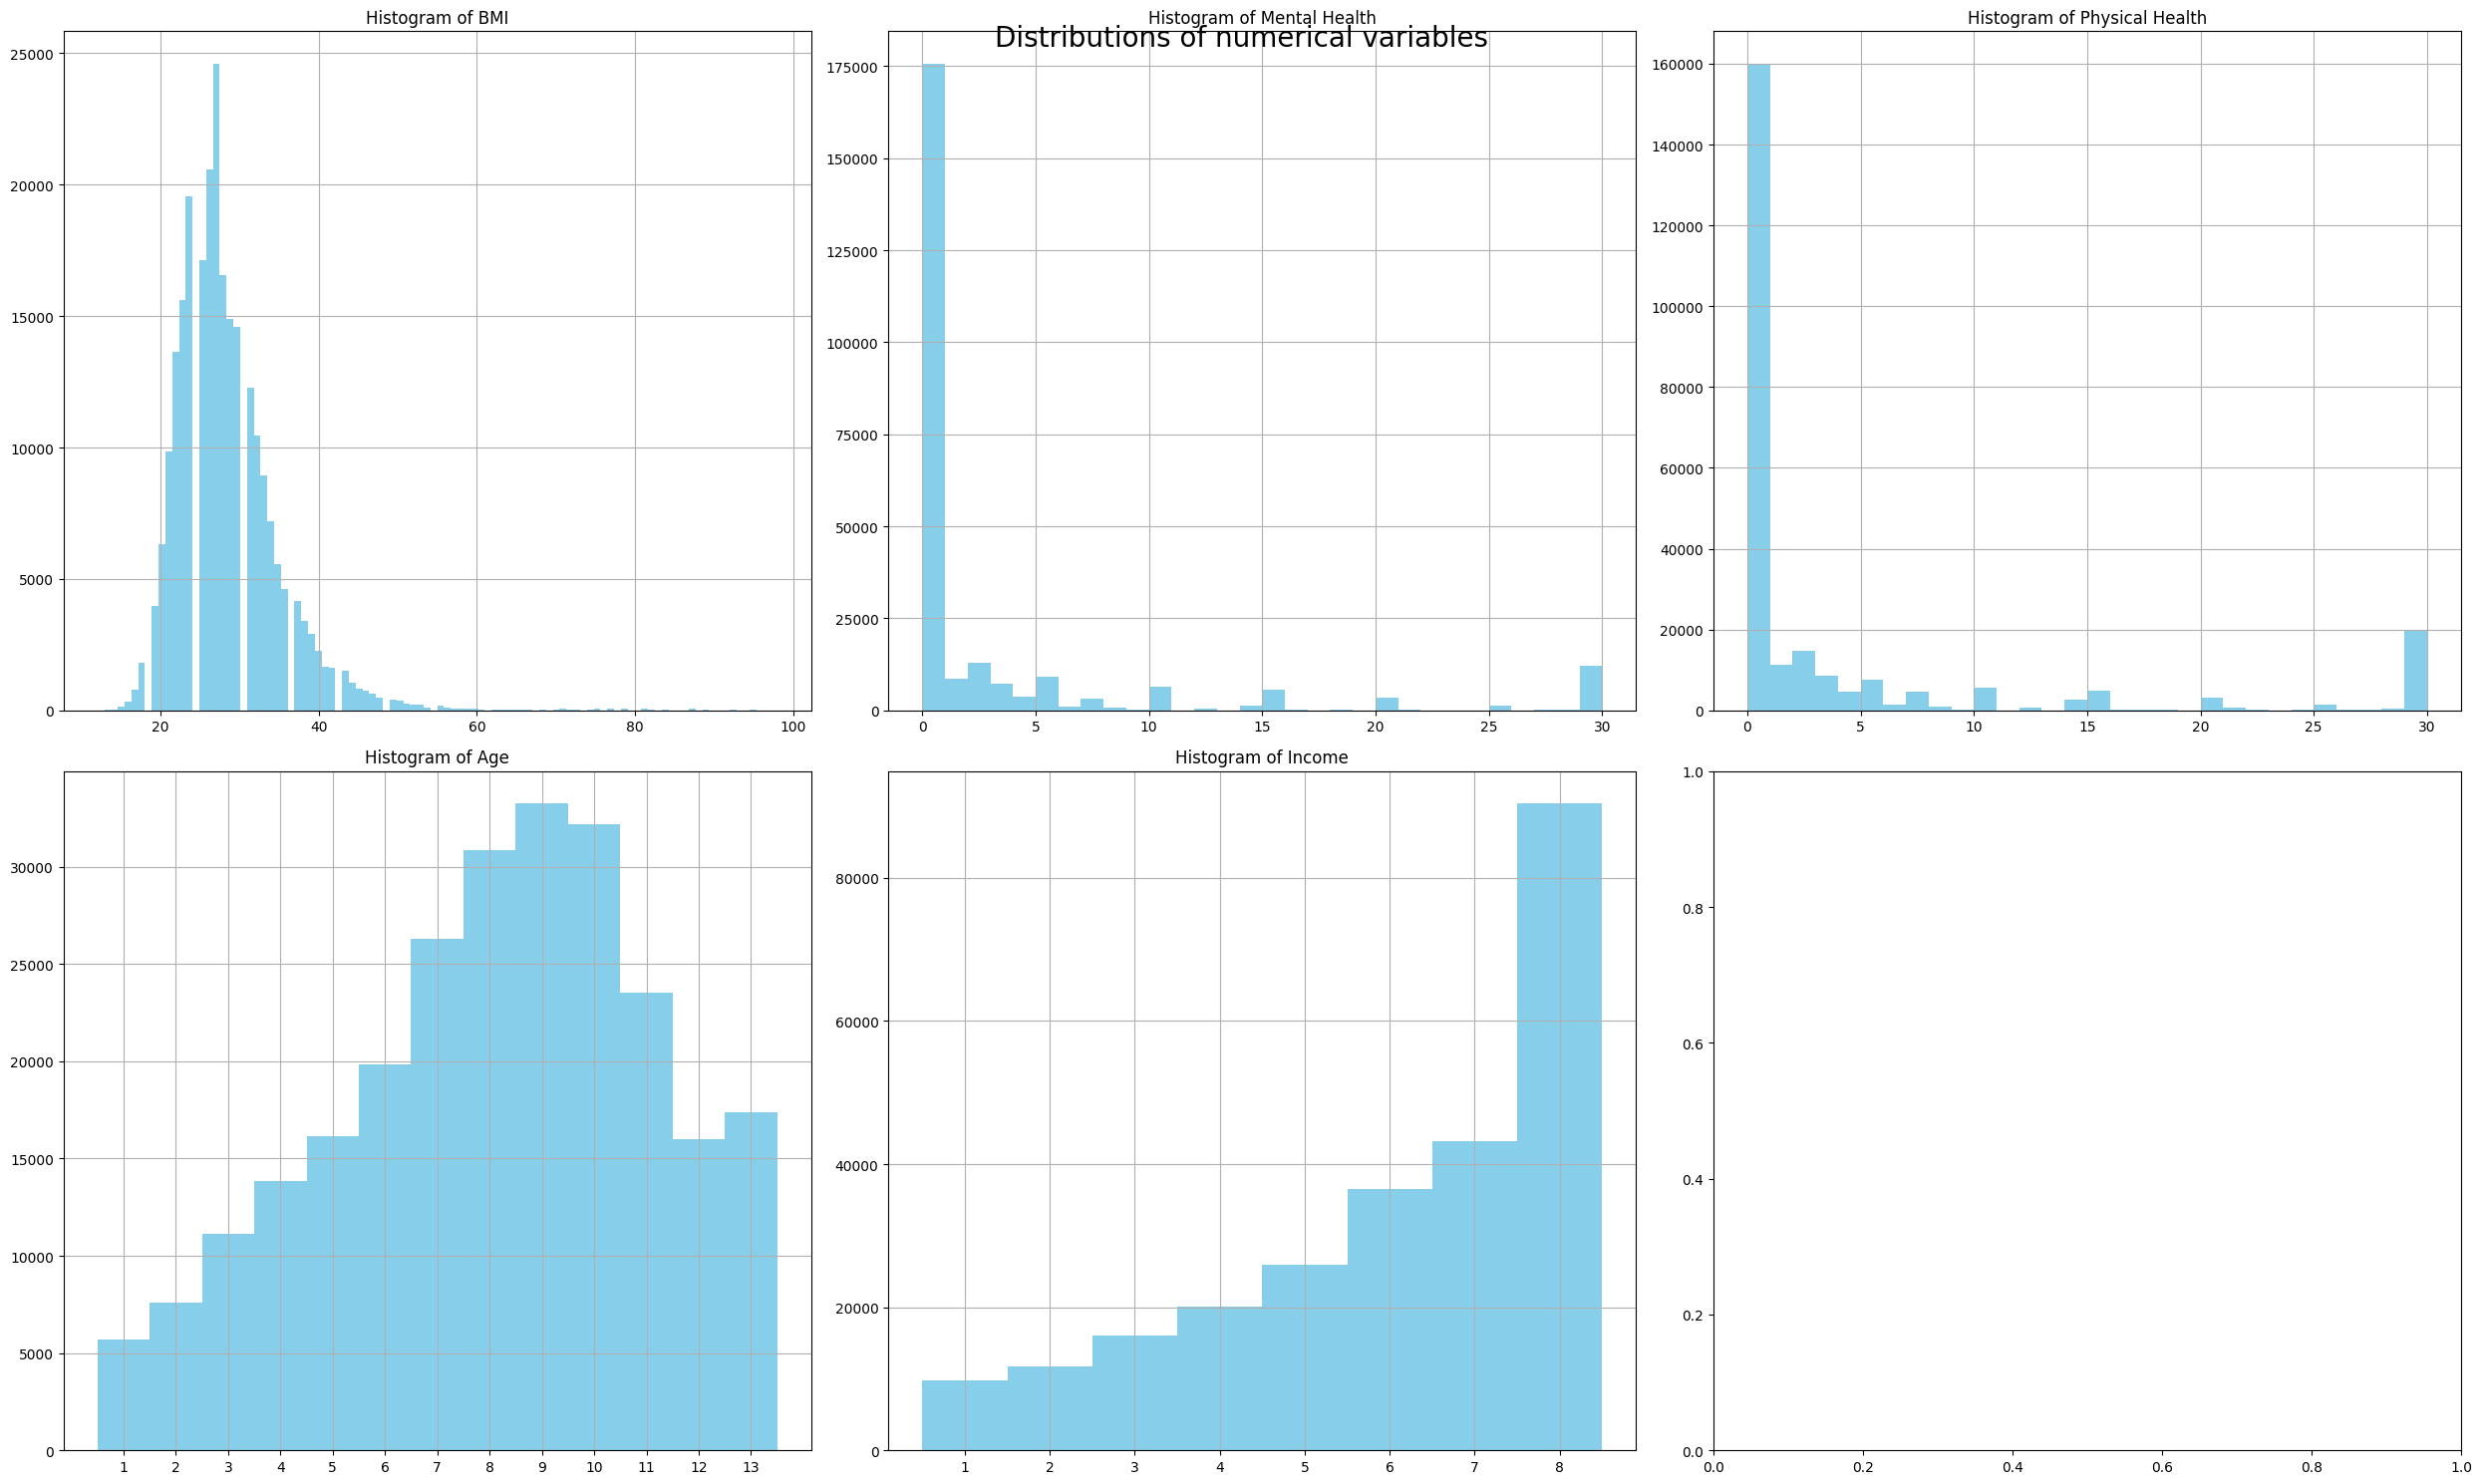

In [6]:
df_numerical = df[['BMI','MentHlth','PhysHlth','Age','Income']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array. 
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Specifications for each subplot
# Subplot for BMI:
axes[0].hist(df_numerical['BMI'], bins=100, color='skyblue')
axes[0].set_title('Histogram of BMI')
axes[0].grid(True)

# Subplot for MentHlth:
axes[1].hist(df_numerical['MentHlth'], bins=30, color='skyblue')
axes[1].set_title('Histogram of Mental Health')
axes[1].grid(True)

# Subplot for PhysHlth:
axes[2].hist(df_numerical['PhysHlth'], bins=30, color='skyblue')
axes[2].set_title('Histogram of Physical Health')
axes[2].grid(True)

# Subplot for Age:
axes[3].hist(df_numerical['Age'], bins=np.arange(0.5, 14, 1), color='skyblue')
axes[3].set_title('Histogram of Age')
axes[3].set_xticks(np.arange(1, 14, 1))  # Set custom xticks
axes[3].grid(True)

# Subplot for Income:
axes[4].hist(df_numerical['Income'], bins=np.arange(0.5, 9, 1), color='skyblue')
axes[4].set_title('Histogram of Income')
axes[4].grid(True)

# Adjust layout
plt.tight_layout()
plt.suptitle("Distributions of numerical variables", fontsize=20)
plt.show()

##### CATEGORICAL FEATURES:
The rest of the variables in the dataset are categorical, having only a set of possible values. Of this, we find those which have only 2 possible values (0 or 1), *BI-CATEGORICAL VARIABLES*; and those which have more than 2 possible values, *MULTI-CATEGORICAL VARIABLES*.

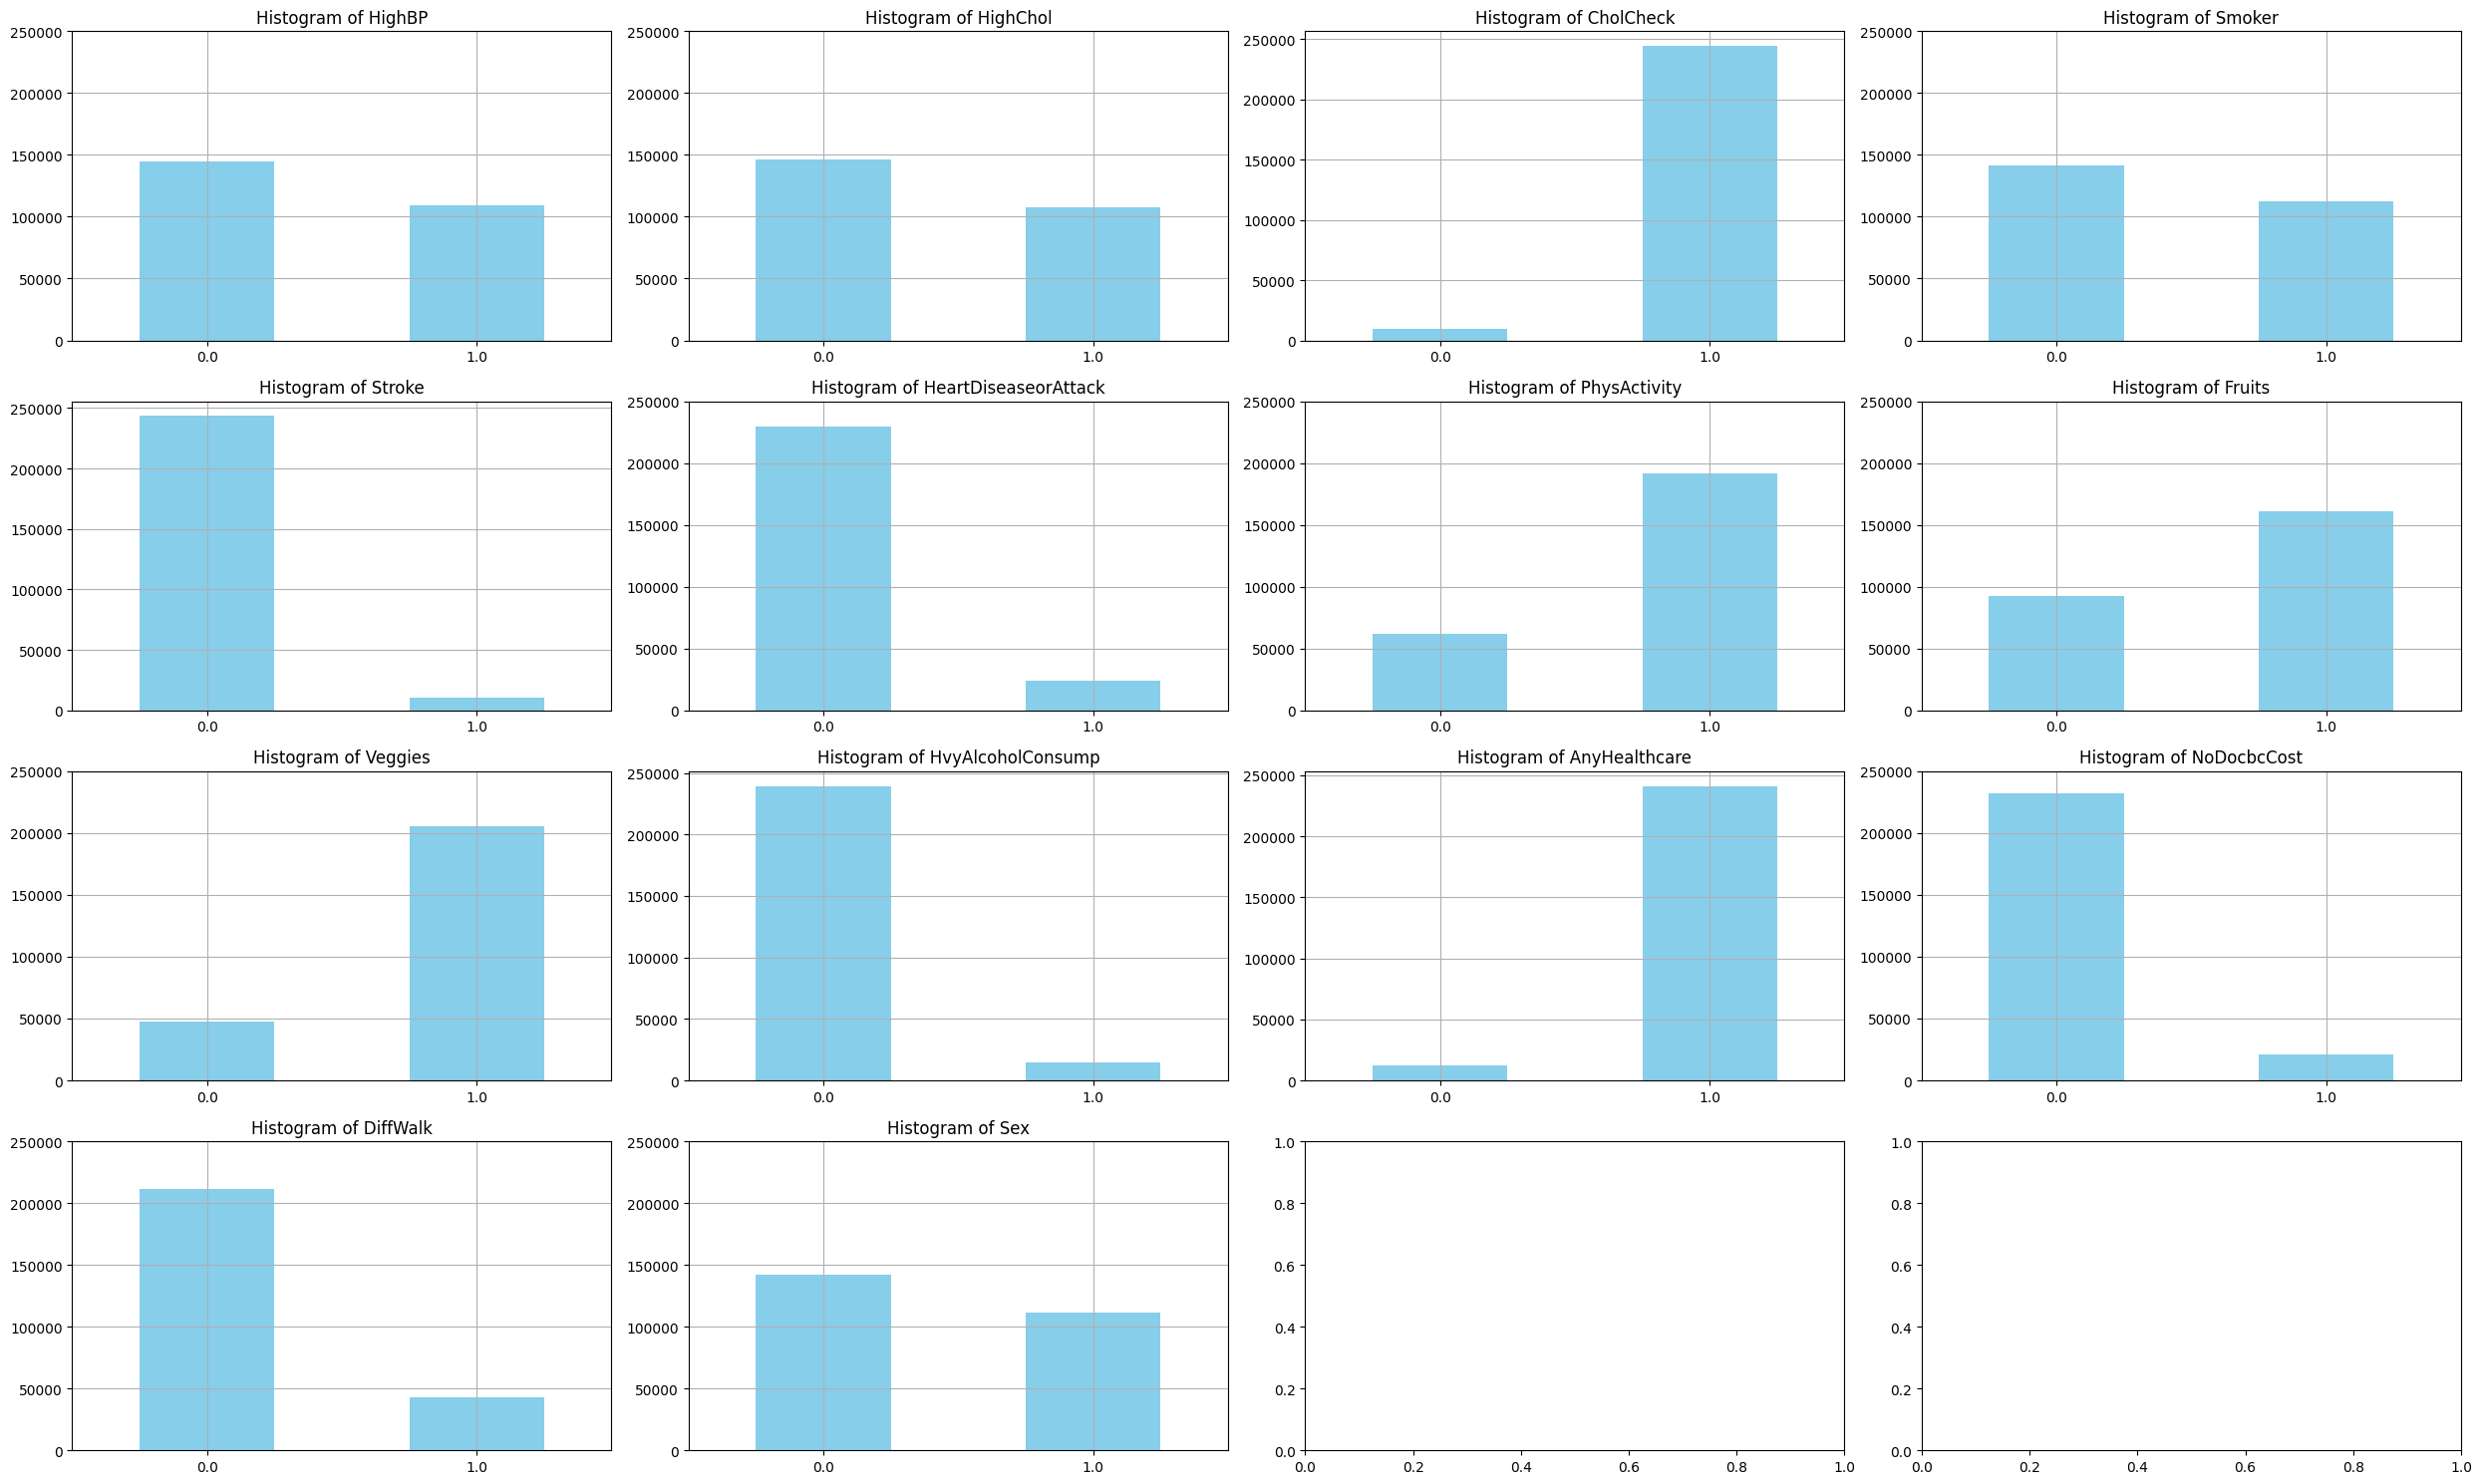

In [7]:
# BI-CATEGORICAL VARIABLES:
df_biCategorical = df[['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 15)) #'axes' is an array with two elements, 2D. 
                                                            # Each 'axes' object represents one subplot.

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array. 
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

for i, feature in enumerate(df_biCategorical.columns):
    ax = axes[i]
    df_biCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0) 
    ax.set_yticks(np.arange(0, 300000, 50000))
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

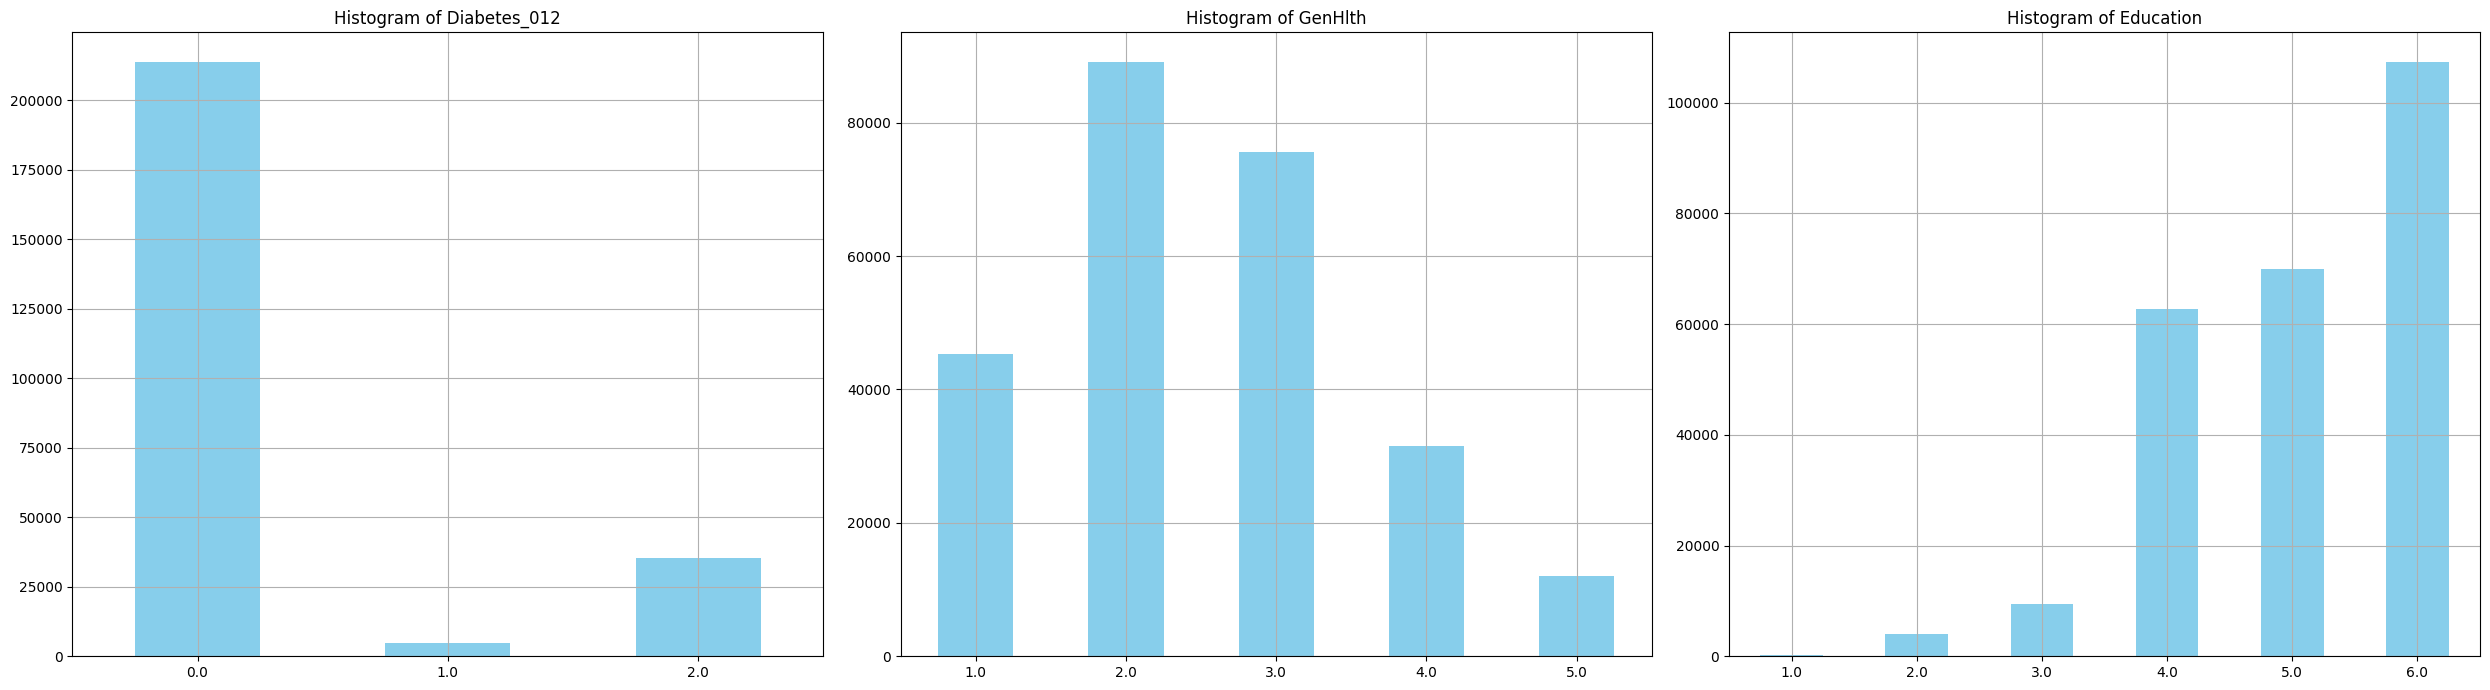

In [8]:
#MULTI-CATEGORICAL VARIABLES:
df_multiCategorical = df[['Diabetes_012','GenHlth','Education']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7)) #'axes' is an array with two elements, 2D. 
                                                            # Each 'axes' object represents one subplot.

for i, feature in enumerate(df_multiCategorical.columns):
    ax = axes[i]
    df_multiCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0) 
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

#### Outliers...

In [9]:
df_numerical['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [10]:
df_numerical['BMI'][df_numerical['BMI']>70].describe()

count    584.000000
mean      80.436644
std        6.673423
min       71.000000
25%       75.000000
50%       79.000000
75%       85.250000
max       98.000000
Name: BMI, dtype: float64